# Двумерная задача нагружения

In [69]:
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
from solver import solver

>### Характеристики среды

In [114]:
L = 3.0
rho = 3.0
cp = 1.0
cs = 1.0
csp = cp - 2 * cs ** 2 / cp
T = 0.3 * L / cp
M = 500
nx = M
ny = M
h = L / M
dt = 0.1 * h / cp

description = {'L': L, 'rho' : rho, 'cp': cp, 'cs': cs, 'csp': csp, 'T': T, 'M': M, 'nx': nx, 'ny': ny, 'h': h, 'dt': dt}

>### Инициализиация плоской волны

In [45]:
def init(desc, A=1, phi=0, delta=1 / 20, pos=1 / 2, shift=0):
    
    import warnings
    warnings.filterwarnings("ignore", category=RuntimeWarning)

    data_current = np.zeros((desc['nx'], desc['ny']), dtype=[('vx', np.float64), ('vy', np.float64), ('sigxx', np.float64), ('sigxy', np.float64), ('sigyy', np.float64)])

    n_x = np.sin(phi / 180 * np.pi)
    n_y = np.cos(phi / 180 * np.pi)

    for j in range(desc['ny']):
        for i in range(desc['nx']):
            x = i * desc['h'] - shift * np.sin(phi / 180 * np.pi)
            y = j * desc['h'] - shift * np.cos(phi / 180 * np.pi)
            if (phi == 0) and (desc['L'] / 20 <= y <= 3 * desc['L'] / 20):
                data_current[j, i]['vx'] = -A * n_x
                data_current[j, i]['vy'] = -A * n_y
                data_current[j, i]['sigxx'] = -A * desc['rho'] * desc['csp'] - A * desc['rho'] * (desc['cp'] - desc['csp']) * n_x ** 2
                data_current[j, i]['sigyy'] = -A * desc['rho'] * desc['csp'] - A * desc['rho'] * (desc['cp'] - desc['csp']) * n_y ** 2
                data_current[j, i]['sigxy'] = -A * desc['rho'] * (cp - desc['csp']) * n_x * n_y
            elif (L * (pos - delta) <= x + y / np.tan(phi / 180 * np.pi) <= L * (pos + delta)) and (x >= 0) and (y >= 0):
                data_current[j, i]['vx'] = -A * n_x
                data_current[j, i]['vy'] = -A * n_y
                data_current[j, i]['sigxx'] = -A * desc['rho'] * desc['csp'] - A * desc['rho'] * (desc['cp'] - desc['csp']) * n_x ** 2
                data_current[j, i]['sigyy'] = -A * desc['rho'] * desc['csp'] - A * desc['rho'] * (desc['cp'] - desc['csp']) * n_y ** 2
                data_current[j, i]['sigxy'] = -A * desc['rho'] * (desc['cp'] - desc['csp']) * n_x * n_y
            else:
                data_current[j, i]['vx'] = 0
                data_current[j, i]['vy'] = 0
                data_current[j, i]['sigxx'] = 0
                data_current[j, i]['sigyy'] = 0
                data_current[j, i]['sigxy'] = 0

    warnings.filterwarnings("default", category=RuntimeWarning)

    return data_current

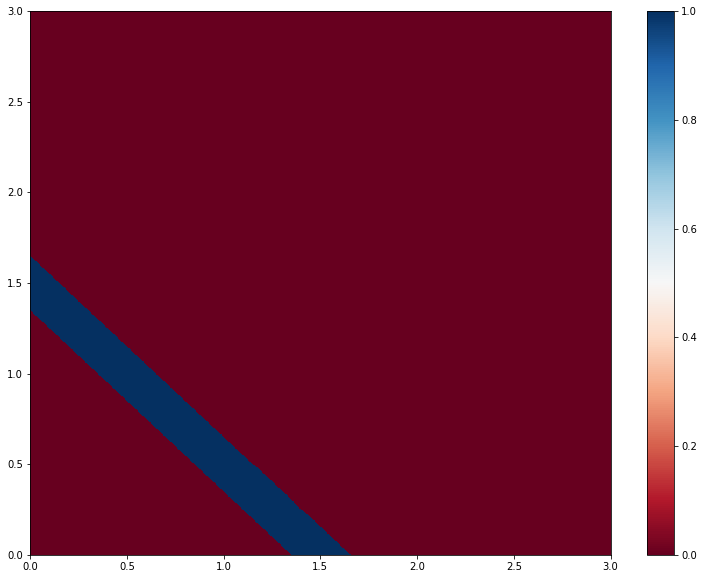

In [9]:
phi = 225

data = init(description, phi=phi)

plt.figure(figsize=(13, 10))
plt.pcolormesh(np.linspace(0, L, nx), np.linspace(0, L, ny), data['vx'] ** 2 + data['vy'] ** 2, cmap='RdBu', vmin=0, vmax=1)
plt.axis([0, L, 0, L])
plt.colorbar()

plt.show()

>### Решение

In [11]:
rs = init(description, phi=phi, shift=cp * T)

>#### Тор

* Тор. Первый порядок.

In [1844]:
solution = solver(data, description)
data_new = solution.solve(border_type='tor', deg=1, vis=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

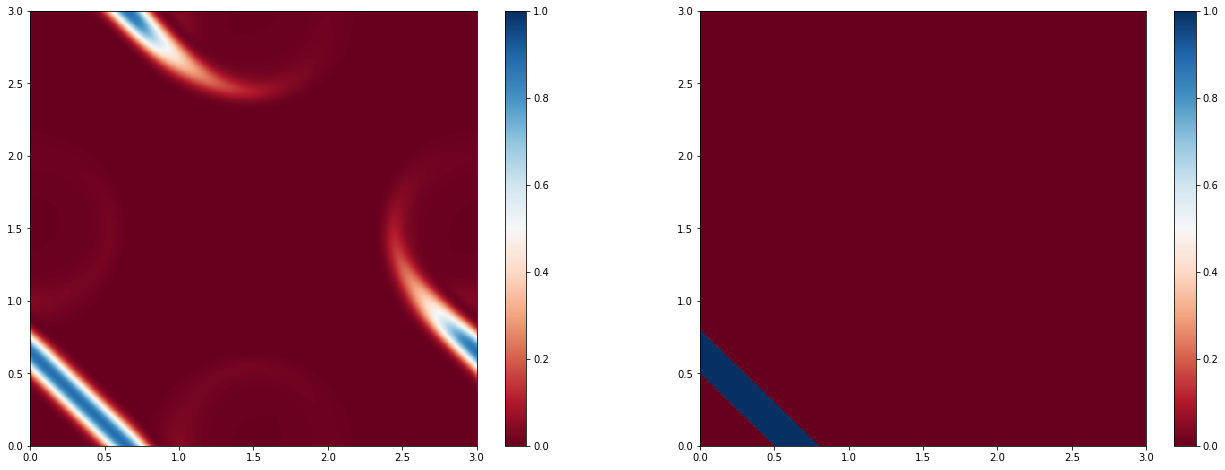

In [1845]:
plt.figure(figsize=(22, 8))

plt.subplot(1, 2, 1)
plt.pcolormesh(np.linspace(0, L, nx), np.linspace(0, L, ny), data_new['vx'] ** 2 + data_new['vy'] ** 2, cmap='RdBu', vmin=0, vmax=1)
plt.axis([0, L, 0, L])
plt.colorbar()

plt.subplot(1, 2, 2)
plt.pcolormesh(np.linspace(0, L, nx), np.linspace(0, L, ny), rs['vx'] ** 2 + rs['vy'] ** 2, cmap='RdBu', vmin=0, vmax=1)
plt.axis([0, L, 0, L])
plt.colorbar()

plt.show()

* Тор. Второй порядок.

In [1846]:
solution = solver(data, description)
data_new = solution.solve(border_type='tor', deg=2, vis=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

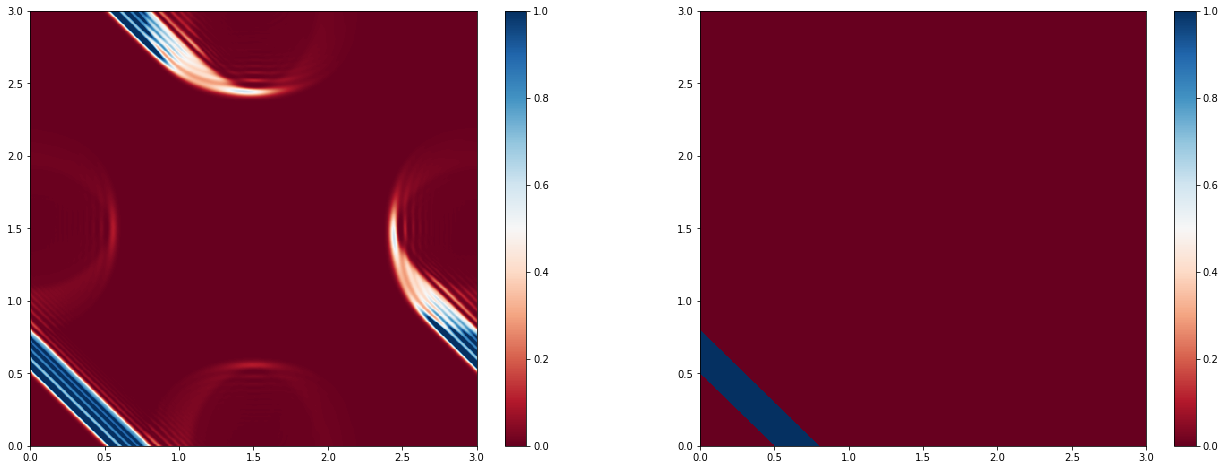

In [1847]:
plt.figure(figsize=(22, 8))

plt.subplot(1, 2, 1)
plt.pcolormesh(np.linspace(0, L, nx), np.linspace(0, L, ny), data_new['vx'] ** 2 + data_new['vy'] ** 2, cmap='RdBu', vmin=0, vmax=1)
plt.axis([0, L, 0, L])
plt.colorbar()

plt.subplot(1, 2, 2)
plt.pcolormesh(np.linspace(0, L, nx), np.linspace(0, L, ny), rs['vx'] ** 2 + rs['vy'] ** 2, cmap='RdBu', vmin=0, vmax=1)
plt.axis([0, L, 0, L])
plt.colorbar()

plt.show()

>#### Поглощение

* Поглощение. Первый порядок.

In [1855]:
solution = solver(data, description)
data_new = solution.solve(border_type='absorb', deg=1, vis=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

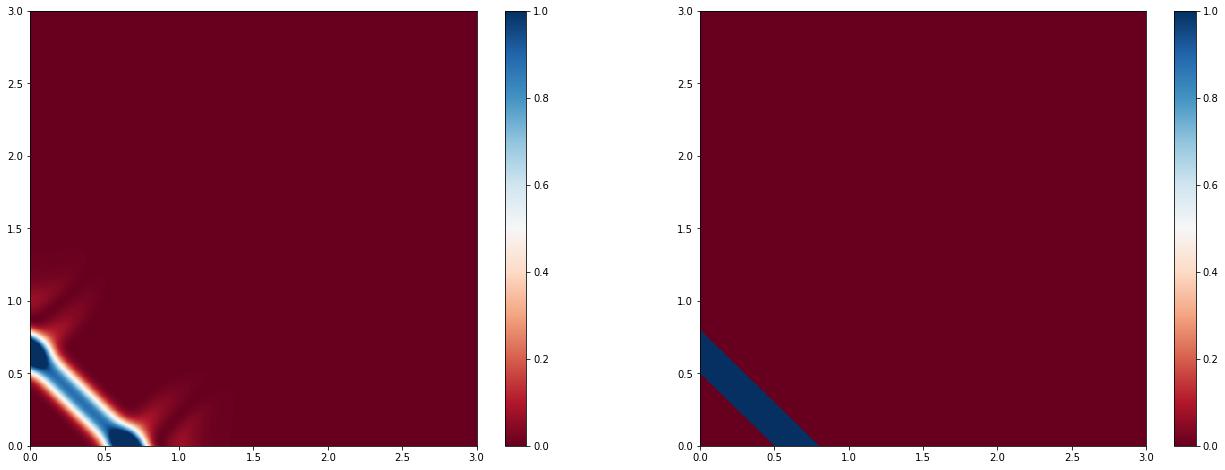

In [1856]:
plt.figure(figsize=(22, 8))

plt.subplot(1, 2, 1)
plt.pcolormesh(np.linspace(0, L, nx), np.linspace(0, L, ny), data_new['vx'] ** 2 + data_new['vy'] ** 2, cmap='RdBu', vmin=0, vmax=1)
plt.axis([0, L, 0, L])
plt.colorbar()

plt.subplot(1, 2, 2)
plt.pcolormesh(np.linspace(0, L, nx), np.linspace(0, L, ny), rs['vx'] ** 2 + rs['vy'] ** 2, cmap='RdBu', vmin=0, vmax=1)
plt.axis([0, L, 0, L])
plt.colorbar()

plt.show()

* Поглощение. Второй порядок.

In [12]:
solution = solver(data, description)
data_new = solution.solve(border_type='absorb', deg=2, vis=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

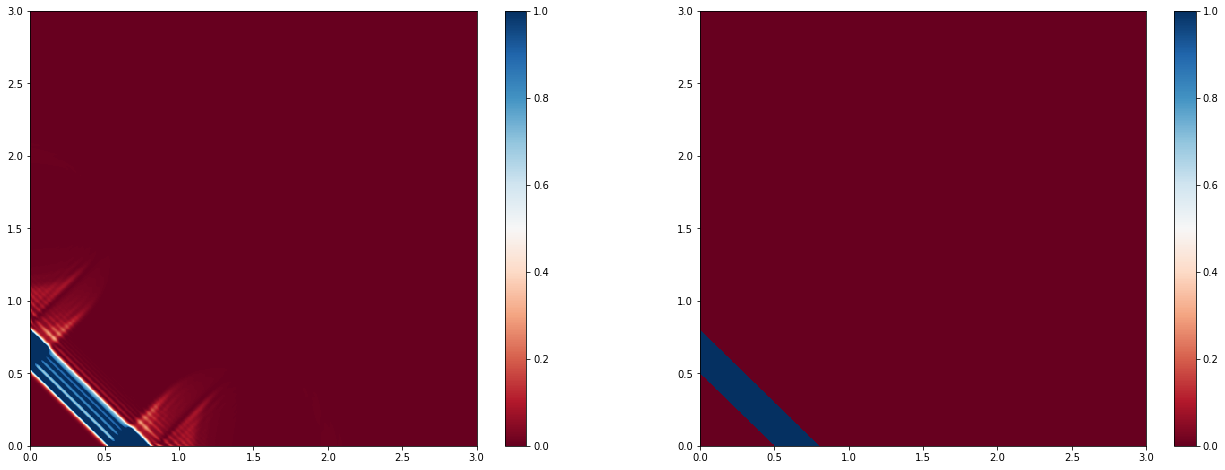

In [13]:
plt.figure(figsize=(22, 8))

plt.subplot(1, 2, 1)
plt.pcolormesh(np.linspace(0, L, nx), np.linspace(0, L, ny), data_new['vx'] ** 2 + data_new['vy'] ** 2, cmap='RdBu', vmin=0, vmax=1)
plt.axis([0, L, 0, L])
plt.colorbar()

plt.subplot(1, 2, 2)
plt.pcolormesh(np.linspace(0, L, nx), np.linspace(0, L, ny), rs['vx'] ** 2 + rs['vy'] ** 2, cmap='RdBu', vmin=0, vmax=1)
plt.axis([0, L, 0, L])
plt.colorbar()

plt.show()

>#### Отражение

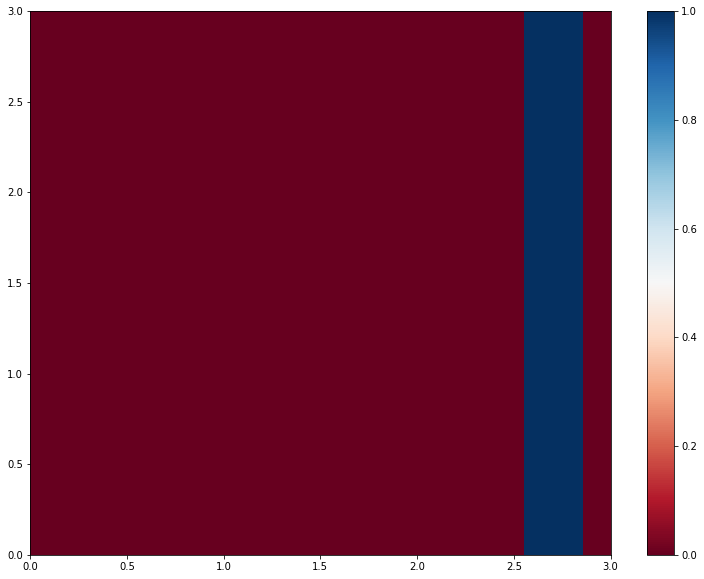

In [115]:
phi = 90

data = init(description, phi=phi, pos=0.9)

plt.figure(figsize=(13, 10))
plt.pcolormesh(np.linspace(0, L, nx), np.linspace(0, L, ny), data['vx'] ** 2 + data['vy'] ** 2, cmap='RdBu', vmin=0, vmax=1)
plt.axis([0, L, 0, L])
plt.colorbar()

plt.show()

* Отражение. Первый порядок.

In [116]:
solution = solver(data, description)
data_new = solution.solve_free(deg=1, vis=True)

  0%|          | 0/1499 [00:00<?, ?it/s]

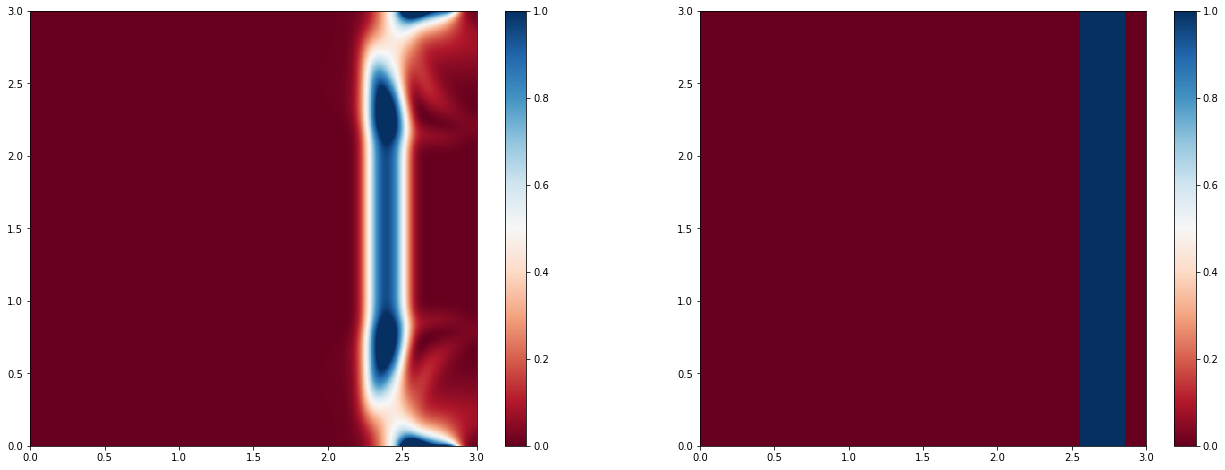

In [117]:
plt.figure(figsize=(22, 8))

plt.subplot(1, 2, 1)
plt.pcolormesh(np.linspace(0, L, nx), np.linspace(0, L, ny), data_new['vx'] ** 2 + data_new['vy'] ** 2, cmap='RdBu', vmin=0, vmax=1)
plt.axis([0, L, 0, L])
plt.colorbar()

plt.subplot(1, 2, 2)
plt.pcolormesh(np.linspace(0, L, nx), np.linspace(0, L, ny), data['vx'] ** 2 + data['vy'] ** 2, cmap='RdBu', vmin=0, vmax=1)
plt.axis([0, L, 0, L])
plt.colorbar()

plt.show()

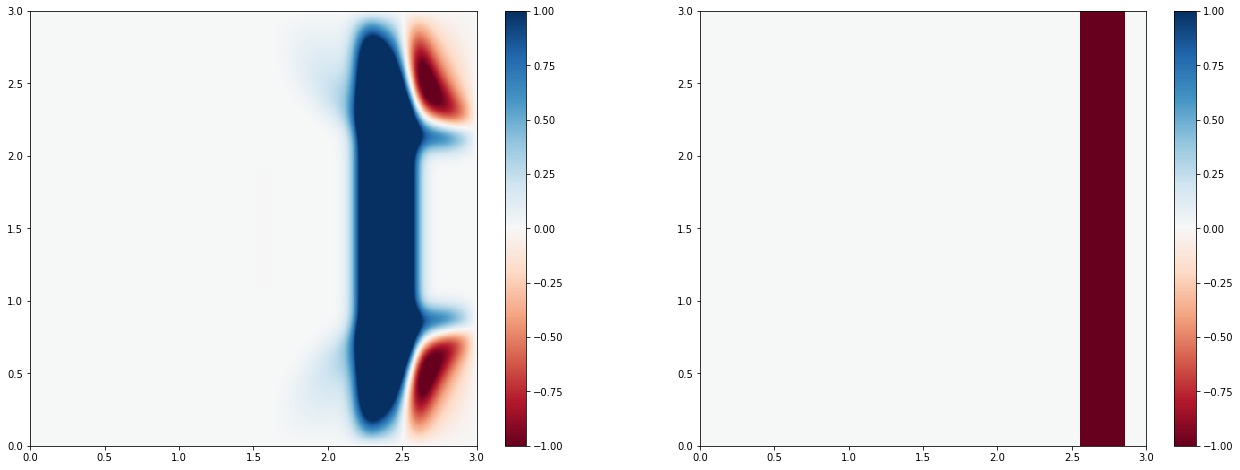

In [118]:
plt.figure(figsize=(22, 8))

plt.subplot(1, 2, 1)
plt.pcolormesh(np.linspace(0, L, nx), np.linspace(0, L, ny), data_new['sigxx'], cmap='RdBu', vmin=-1, vmax=1)
plt.axis([0, L, 0, L])
plt.colorbar()

plt.subplot(1, 2, 2)
plt.pcolormesh(np.linspace(0, L, nx), np.linspace(0, L, ny), data['sigxx'], cmap='RdBu', vmin=-1, vmax=1)
plt.axis([0, L, 0, L])
plt.colorbar()

plt.show()

* Отражение. Второй порядок.

In [119]:
solution = solver(data, description)
data_new = solution.solve_free(deg=2, vis=True)

  0%|          | 0/1499 [00:00<?, ?it/s]

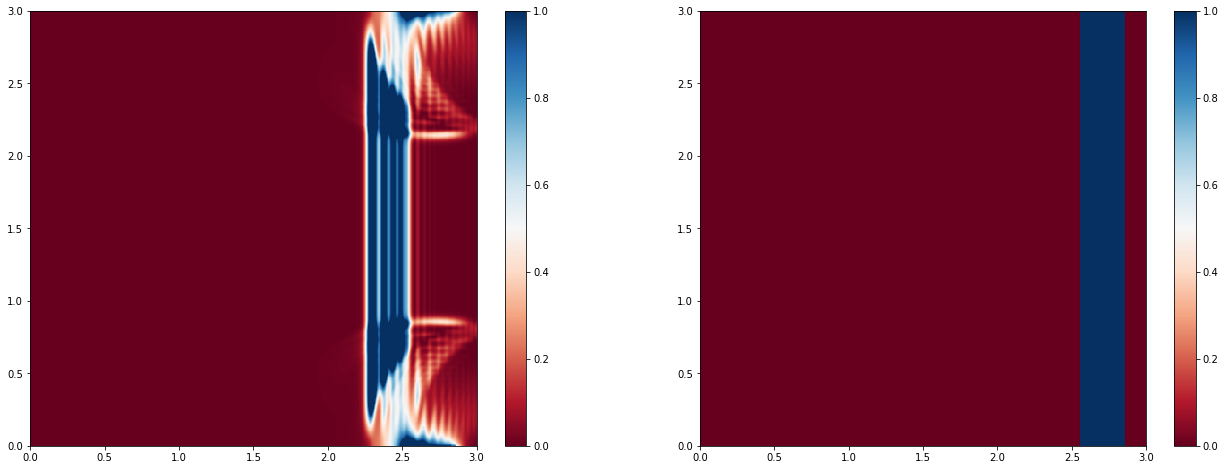

In [120]:
plt.figure(figsize=(22, 8))

plt.subplot(1, 2, 1)
plt.pcolormesh(np.linspace(0, L, nx), np.linspace(0, L, ny), data_new['vx'] ** 2 + data_new['vy'] ** 2, cmap='RdBu', vmin=0, vmax=1)
plt.axis([0, L, 0, L])
plt.colorbar()

plt.subplot(1, 2, 2)
plt.pcolormesh(np.linspace(0, L, nx), np.linspace(0, L, ny), data['vx'] ** 2 + data['vy'] ** 2, cmap='RdBu', vmin=0, vmax=1)
plt.axis([0, L, 0, L])
plt.colorbar()

plt.show()

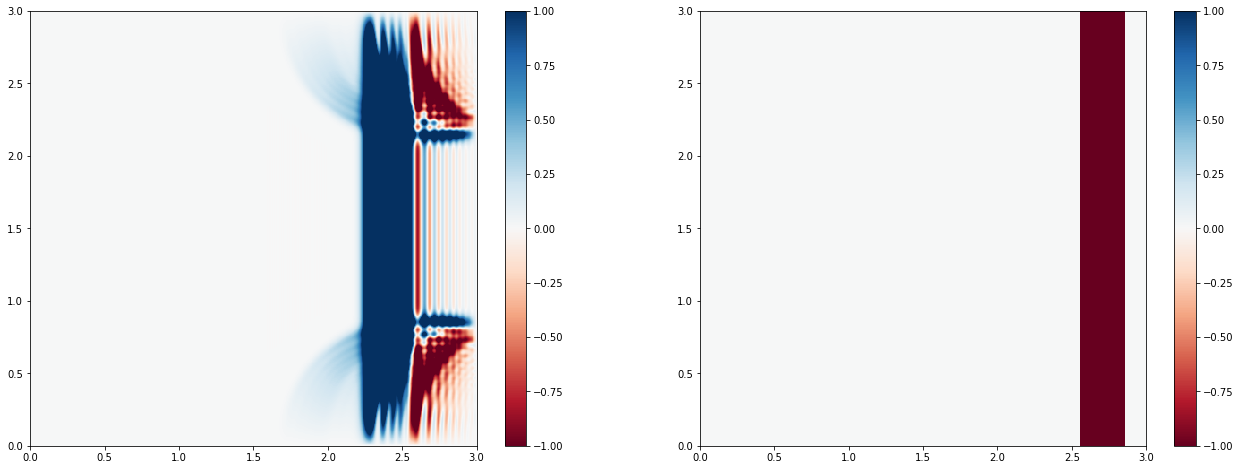

In [121]:
plt.figure(figsize=(22, 8))

plt.subplot(1, 2, 1)
plt.pcolormesh(np.linspace(0, L, nx), np.linspace(0, L, ny), data_new['sigxx'], cmap='RdBu', vmin=-1, vmax=1)
plt.axis([0, L, 0, L])
plt.colorbar()

plt.subplot(1, 2, 2)
plt.pcolormesh(np.linspace(0, L, nx), np.linspace(0, L, ny), data['sigxx'], cmap='RdBu', vmin=-1, vmax=1)
plt.axis([0, L, 0, L])
plt.colorbar()

plt.show()

>### Тест

In [ ]:
L = 3.0
rho = 3.0
cp = 1.0
cs = 1.0
csp = cp - 2 * cs ** 2 / cp
T = 0.3 * L / cp
M = 50
nx = M
ny = M
h = L / M
dt = 0.1 * h / cp

description = {'L': L, 'rho' : rho, 'cp': cp, 'cs': cs, 'csp': csp, 'T': T, 'M': M, 'nx': nx, 'ny': ny, 'h': h, 'dt': dt}

In [ ]:
phi = 225

data = init(description, phi=phi)

plt.figure(figsize=(13, 10))
plt.pcolormesh(np.linspace(0, L, nx), np.linspace(0, L, ny), data['vx'] ** 2 + data['vy'] ** 2, cmap='RdBu', vmin=0, vmax=1)
plt.axis([0, L, 0, L])
plt.colorbar()

plt.show()

In [ ]:
solution = solver(data, description)
data_new = solver.solve()

In [ ]:
plt.figure(figsize=(22, 8))

plt.subplot(1, 2, 1)
plt.pcolormesh(np.linspace(0, L, nx), np.linspace(0, L, ny), data_new['vx'] ** 2 + data_new['vy'] ** 2, cmap='RdBu', vmin=0, vmax=1)
plt.axis([0, L, 0, L])
plt.colorbar()

plt.subplot(1, 2, 2)
plt.pcolormesh(np.linspace(0, L, nx), np.linspace(0, L, ny), rs['vx'] ** 2 + rs['vy'] ** 2, cmap='RdBu', vmin=0, vmax=1)
plt.axis([0, L, 0, L])
plt.colorbar()

plt.show()